## LENSPOP MODEL ADAPTED FOR SUBMILLIMETRE GALAXIES

## This notebook has three sections:

### (1) flowcharts showing the relationship between the routines in the model, the model's data input and output, and a chart showing where the model parameters are generated;

### (2) the order of running the three main routines in the model; and

### (3) a couple of example routines extracting data from the results for analysis, using fraction of sky frac=0.25, and lensed flux >10 mJy.<br><br><br>

## The routines in the model


![main routines](flowchart4a.png)

## Model dataflow<br>

![dataflow of model](flowchart1a.png)

## Generation of model parameters

![main routines](flowchart3a.png)

## Run the model

In [ ]:
pwd # check current dictionary is correct

In [ ]:
%run MakeLensPop  # generates all lenses on sky  - takes ~6 hours - file is 6Gb

In [ ]:
%run ModelAll # settings: frac=0.25  criterion >10mJy  -  takes ~ 24 hours

In [445]:
%run MakeResults   # frac 0.25, criterion >10 mJy    ,,, does not gake much time

chunk 0
chunk 1
chunk 2
chunk 3
chunk 4
chunk 5
chunk 6
chunk 7
chunk 8
chunk 9
chunk 10
chunk 11
chunk 12
chunk 13
chunk 14
chunk 15
chunk 16
chunk 17
chunk 18
chunk 19
chunk 20
chunk 21
chunk 22
chunk 23
chunk 24
chunk 25
chunk 26
chunk 27
chunk 28
chunk 29
chunk 30
chunk 31
chunk 32
chunk 33
chunk 34
txt file saved:  lenses_submm_0.25_10.txt
pkl file saved:  submm_0.25_10_lists.pkl
Routine ended!


## Examples of figures from model results
#### note: data file for >10mJy, frac=0.25, included on GitHub

Number of lensed sources by flux
bins  mid  number
10 20   15    84,844
20 30   25    24,952
30 40   35    10,764
40 50   45    5,768
50 60   55    3,468
60 70   65    2,220
70 80   75    1,420
80 90   85    884
90 100   95    696
Over 100      2,096
Total       137,112


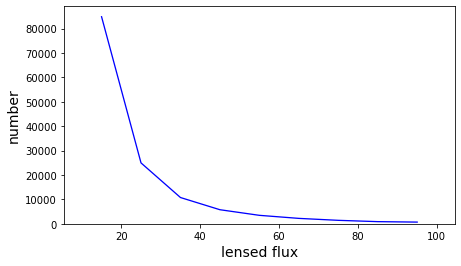

In [29]:
# sources by lensed flux 

import numpy as np
import matplotlib.pyplot as plt


# data for criterion S500>10 mJy, frac=0.25
data10 = np.loadtxt('lenses_submm_0.25_10.txt')  # add pathway if necessary

# data fields for lenses_submm_0.25_10.txt
#  [0] zl      [1] zs     [2] b    [3] sigl    [4] ql
#  [5] rl      [6] ml     [7] xs   [8] ys      [9] qs     
# [10] ps     [11] rs    [12] ms  [13] mag    [14] msrc   
# [15] seeing [16] rfsn
# note ms   is log_unlensed  source flux at 500um in submm data
# note msrc is lensed        source flux at 500um in submm data


# set up bins
bins = np.arange(10,110,10)
number=np.size(bins)-1
binmid=np.zeros(number)
for i in range(number):
    binmid[i]=(bins[i]+bins[i+1])/2.0
    i+=1
    
     
fig, ax = plt.subplots(figsize=(7,4))
    
# calculate histogram data and plot
lensed_flux =  data10[:,14]
counts1, bins1, bars1 = plt.hist(lensed_flux, bins=bins,\
         density=False, histtype='bar',color='white')
counts1 = counts1*(1/0.25)  # whole sky number (frac is 0.25) 

ax.plot(binmid, counts1, color='blue',linewidth=1.3) 
ax.set_xlabel('lensed flux',fontsize=14)
ax.set_ylabel('number', fontsize=14)


# print table of histogram
print("Number of lensed sources by flux")
print('bins  mid  number')
for i in np.arange(number):
    print(bins[i],bins[i+1],' ',int(binmid[i]),'  ', '{:,}'.format(int(counts1[i])))
ok=np.where(lensed_flux >= 100) 
over100 = lensed_flux[ok]
print('Over 100     ', '{:,}'.format(int(4.0*over100.size)))
print('Total      ', '{:,}'.format(int(4.0*lensed_flux.size)))



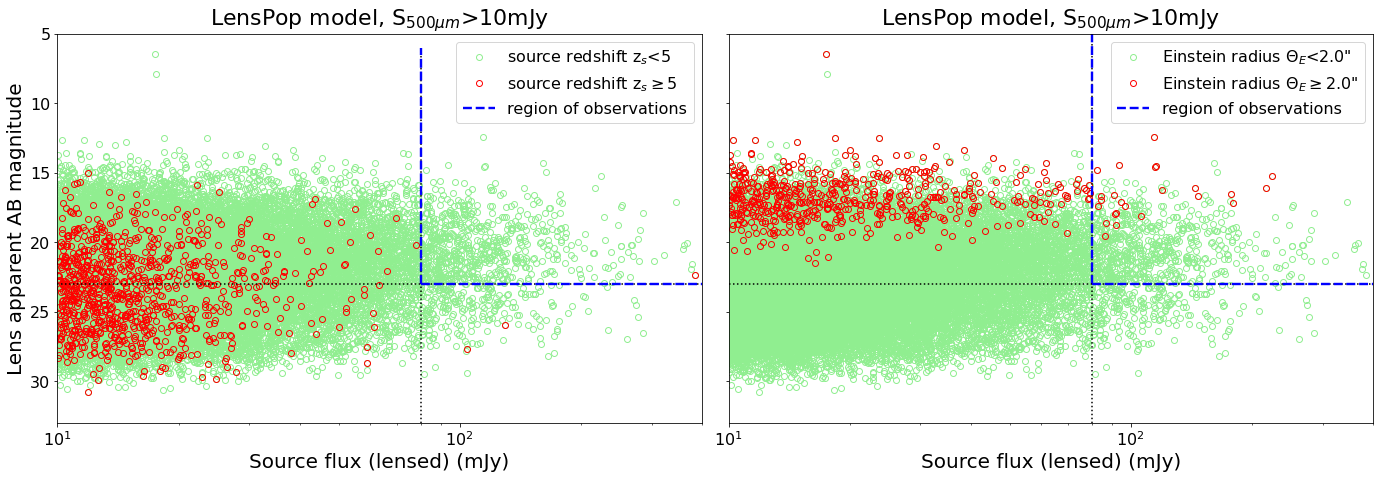

In [33]:
# Plot source lensed flux asgainst foreground lens apparent magnitude,
# highlighting high redshift sources and high Einstein radius sources
# and region of observations to date 


import numpy as np
import matplotlib.pyplot as plt


# data for criterion S500>10 mJy
data10 = np.loadtxt('lenses_submm_0.25_10.txt')

# data fields for lenses_submm_0.25_10.txt
#  [0] zl      [1] zs     [2] b    [3] sigl    [4] ql
#  [5] rl      [6] ml     [7] xs   [8] ys      [9] qs     
# [10] ps     [11] rs    [12] ms  [13] mag    [14] msrc   
# [15] seeing [16] rfsn

# note ms   is log_unlensed  source flux at 500um in submm data
# note msrc is lensed        source flux at 500um in submm data


sourceflux    = data10[:,14]
lensmagnitude = data10[:,6]


fig, ax = plt.subplots(1,2,sharey=True,figsize=(19,6))
fig.tight_layout()

ax[0].plot(sourceflux,lensmagnitude,'o',color='lightgreen',mfc='none',label='source redshift z$_s$<5')

# over plot high-z sources in  red
high_zs = np.where(data10[:,1]>=5.0)
data_high_zs = data10[high_zs]

ax[0].plot(data_high_zs[:,14],data_high_zs[:,6],'o',color='red',mfc='none',label='source redshift z$_s\geq$5')
ax[0].vlines(80,35,6, linestyle='dotted', color='black')
ax[0].vlines(80,23,6,linestyle='dashed', linewidth=2.4,color='blue',label='region of observations')
ax[0].hlines(23,10,500, linestyle='dotted', color='black')
ax[0].hlines(23,80,500, linestyle='dashed', linewidth=2.4,color='blue')
ax[0].set_xlim([10.0,400.0])
ax[0].set_ylim(33,6)
ax[0].set_title('LensPop model, S$_{500\mu m}$>10mJy', fontsize=22)
ax[0].set_xlabel('Source flux (lensed) (mJy)', fontsize=20)
ax[0].set_ylabel('Lens apparent AB magnitude', fontsize=20)
ax[0].set_xscale('log')
ax[0].tick_params(axis='both',labelsize=16)
ax[0].legend(fontsize=16, loc='upper right')



ax[1].plot(sourceflux,lensmagnitude,'o',color='lightgreen',mfc='none',label='Einstein radius $\Theta_E$<2.0"')

# over plot high-theta_einstein sources in  red
high_theta = np.where(data10[:,2]>=2.0)
data_high_theta = data10[high_theta]

ax[1].plot(data_high_theta[:,14],data_high_theta[:,6],'o',color='red',mfc='none',label='Einstein radius $\Theta_E\geq$2.0"')
ax[1].vlines(80,35,5, linestyle='dotted', color='black')
ax[1].vlines(80,23,5,linestyle='dashed', linewidth=2.4,color='blue',label='region of observations')
ax[1].hlines(23,10,500, linestyle='dotted', color='black')
ax[1].hlines(23,80,500, linestyle='dashed', linewidth=2.4,color='blue')
ax[1].set_xlim([10.0,400.0])
ax[1].set_ylim(33,5)
ax[1].set_title('LensPop model, S$_{500\mu m}$>10mJy', fontsize=22)
ax[1].set_xlabel('Source flux (lensed) (mJy)', fontsize=20)
ax[1].set_xscale('log')
ax[1].tick_params(axis='both',labelsize=16)
ax[1].legend(fontsize=16)
